![alt text](task1.png "Title")

In [3]:
import numpy as np
import os
import math
import sys
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles as quantile

In [4]:
def newton_method_iter(A,wk,h,fk,gk,alpha):
    #print(wk.shape)
    uk,vk=np.split(wk,2)
    hpk=-alpha*uk*vk/(uk**2+vk**2) 
    #print(hpk.shape,fk.shape)
    #print(hpk.shape)
    hk=np.append(hpk+fk,hpk-gk)
    H=h**2*(hk)
    dhk1=-alpha*vk*(vk**2-uk**2)/((uk**2+vk**2)**2)
    dhk2=-alpha*uk*(uk**2-vk**2)/((vk**2+uk**2)**2)
    dhk=np.append(dhk1,dhk2)
    wk=np.append(uk,vk)
    dH=h**2*(dhk)
    
    #print(type(wk))
    y=np.linalg.solve(A+dH,-(np.matmul(A,wk)+H  )  )
    #print(y.shape)
    return wk+y

In [5]:
def solve(f,g,alpha,h,w=None):
    i=0
    n=int(1/h-1)
    if w==None:
        w=np.ones(2*n)
    xk=np.linspace(h,1-h,n)
    fk=np.vectorize(f)(xk)
    gk=np.vectorize(g)(xk)
    
    arr=np.array([1 for _ in range(2*n)])
    A=np.diag(-2*arr,k=0)+np.diag(np.delete(arr,0),k=1)+np.diag(np.delete(arr,0),k=-1)
    A[n][n-1]=0
    A[n-1][n-1]=-1
    A[n-1][n]=0
    
    uk,vk=np.split(w,2)
    y=np.zeros(len(w))
    y[0]=-1
    while ((np.max(np.abs(y-w))>0.00001) and (i<2000)):
        i=i+1
        y=w
        w=newton_method_iter(A,w,h,fk,gk,alpha)
    print(i)
    return w
    

In [6]:
def interpol(arr,x):
    n=len(arr)
    h=1/(n+1)
    left=int(x//h)-1
    right=left+1
    weight_r=(x%h)/h

    if left==0-1:
        return arr[0]
    if left==len(arr)-1:
        return arr[len(arr)-1]
    else:
        return (1-weight_r)*arr[left]+weight_r*arr[right]

In [102]:
df_u.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_u.columns = ['h='+str(x) for x in [0.1,0.01,0.07]]
df_v.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_v.columns = ['h='+str(x) for x in [0.1,0.01,0.07]]

In [55]:
def f(x):
    return 0
def g(x):
    return 0
alpha=0


In [56]:
w = solve(f=f,g=g,alpha=alpha,h=0.1)
u,v = np.split(w,2)
df_u1=pd.DataFrame([interpol(u, 0.1*x) for x in range(1,10,1)])
df_v1=pd.DataFrame([interpol(v, 0.1*x) for x in range(1,10,1)])

2


In [57]:
%%time
w=solve(f=f,g=g,alpha=alpha,h=0.01)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

w=solve(f=f,g=g,alpha=1,h=0.001)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

2
2
Wall time: 774 ms


In [58]:
%%time
w=solve(f=f,g=g,alpha=1,h=0.0001)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

2
Wall time: 2min 38s


In [59]:
df_u1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_u1.columns = ['h='+str(x) for x in [0.1,0.01,0.001,0.0001]]
df_v1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_v1.columns = ['h='+str(x) for x in [0.1,0.01,0.001,0.0001]]

In [62]:
print('alpha=0, f(x)=0,  g(x)=0')
print('\n')
print('Таблица значений приближения для функции u:')
round(df_u1,3)

alpha=0, f(x)=0,  g(x)=0


Таблица значений приближения для функции u:


,h=0.1,h=0.01,h=0.001,h=0.0001
x=0.1,0.0,0.0,0.0,0.0
x=0.2,0.0,0.0,0.0,0.0
x=0.3,0.0,0.0,0.0,0.0
x=0.4,0.0,0.0,0.0,0.0
x=0.5,0.0,0.0,0.0,0.0
x=0.6,0.0,0.0,0.0,0.0
x=0.7,0.0,0.0,0.0,0.0
x=0.8,0.0,0.0,0.0,0.0
x=0.9,0.0,0.0,0.0,0.0


In [63]:
print('alpha=0, f(x)=0,  g(x)=0')
print('\n')
print('Таблица значений приближения для функции v:')
round(df_v1,3)

alpha=0, f(x)=0,  g(x)=0


Таблица значений приближения для функции v:


,h=0.1,h=0.01,h=0.001,h=0.0001
x=0.1,0.0,0.0,0.0,0.0
x=0.2,0.0,0.0,0.0,0.0
x=0.3,0.0,0.0,0.0,0.0
x=0.4,0.0,0.0,0.0,0.0
x=0.5,0.0,0.0,0.0,0.0
x=0.6,0.0,0.0,0.0,0.0
x=0.7,0.0,0.0,0.0,0.0
x=0.8,0.0,0.0,0.0,0.0
x=0.9,0.0,0.0,0.0,0.0


In [103]:
def f(x):
    return 0
def g(x):
    return 0
alpha=1


In [104]:
w = solve(f=f,g=g,alpha=alpha,h=0.1)
u,v = np.split(w,2)
df_u1=pd.DataFrame([interpol(u, 0.1*x) for x in range(1,10,1)])
df_v1=pd.DataFrame([interpol(v, 0.1*x) for x in range(1,10,1)])

13


In [105]:
%%time
w=solve(f=f,g=g,alpha=alpha,h=0.01)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

w=solve(f=f,g=g,alpha=alpha,h=0.001)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

78
468
Wall time: 1min 58s


In [106]:
df_u1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_u1.columns = ['h='+str(x) for x in [0.1,0.01,0.001]]
df_v1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_v1.columns = ['h='+str(x) for x in [0.1,0.01,0.001]]

In [107]:
print('alpha=1, f(x)=0,  g(x)=0')
print('\n')
print('Таблица значений приближения для функции u:')
round(df_u1,3)

alpha=1, f(x)=0,  g(x)=0


Таблица значений приближения для функции u:


,h=0.1,h=0.01,h=0.001
x=0.1,-0.029,-0.028,-0.029
x=0.2,-0.053,-0.053,-0.053
x=0.3,-0.073,-0.073,-0.073
x=0.4,-0.088,-0.088,-0.089
x=0.5,-0.101,-0.101,-0.101
x=0.6,-0.109,-0.109,-0.110
x=0.7,-0.114,-0.115,-0.116
x=0.8,-0.117,-0.118,-0.119
x=0.9,-0.118,-0.119,-0.120


In [108]:
print('alpha=1, f(x)=0,  g(x)=0')
print('\n')
print('Таблица значений приближения для функции v:')
round(df_v1,3)

alpha=1, f(x)=0,  g(x)=0


Таблица значений приближения для функции v:


,h=0.1,h=0.01,h=0.001
x=0.1,-0.017,-0.017,-0.017
x=0.2,-0.029,-0.029,-0.029
x=0.3,-0.037,-0.037,-0.037
x=0.4,-0.041,-0.041,-0.041
x=0.5,-0.041,-0.041,-0.041
x=0.6,-0.038,-0.038,-0.038
x=0.7,-0.032,-0.031,-0.032
x=0.8,-0.023,-0.022,-0.023
x=0.9,-0.012,-0.012,-0.012


In [110]:
def f(x):
    return 1
def g(x):
    return 2
alpha=0


In [111]:
w = solve(f=f,g=g,alpha=alpha,h=0.1)
u,v = np.split(w,2)
df_u1=pd.DataFrame([interpol(u, 0.1*x) for x in range(1,10,1)])
df_v1=pd.DataFrame([interpol(v, 0.1*x) for x in range(1,10,1)])

2


In [112]:
%%time
w=solve(f=f,g=g,alpha=alpha,h=0.01)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

w=solve(f=f,g=g,alpha=1,h=0.001)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

2
2
Wall time: 774 ms


In [115]:
df_u1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_u1.columns = ['h='+str(x) for x in [0.1,0.01,0.001]]
df_v1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_v1.columns = ['h='+str(x) for x in [0.1,0.01,0.001]]

In [118]:
print('alpha=0, f(x)=1,  g(x)=2')
print('\n')
print('Таблица значений приближения для функции u:')
round(df_u1,3)

alpha=0, f(x)=1,  g(x)=2


Таблица значений приближения для функции u:


,h=0.1,h=0.01,h=0.001
x=0.1,0.09,0.095,0.095
x=0.2,0.17,0.179,0.180
x=0.3,0.24,0.254,0.255
x=0.4,0.30,0.318,0.320
x=0.5,0.35,0.372,0.375
x=0.6,0.39,0.417,0.420
x=0.7,0.42,0.452,0.455
x=0.8,0.44,0.476,0.480
x=0.9,0.45,0.491,0.495


In [119]:
print('alpha=0, f(x)=1,  g(x)=2')
print('\n')
print('Таблица значений приближения для функции v:')
round(df_v1,3)

alpha=0, f(x)=1,  g(x)=2


Таблица значений приближения для функции v:


,h=0.1,h=0.01,h=0.001
x=0.1,-0.09,-0.09,-0.09
x=0.2,-0.16,-0.16,-0.16
x=0.3,-0.21,-0.21,-0.21
x=0.4,-0.24,-0.24,-0.24
x=0.5,-0.25,-0.25,-0.25
x=0.6,-0.24,-0.24,-0.24
x=0.7,-0.21,-0.21,-0.21
x=0.8,-0.16,-0.16,-0.16
x=0.9,-0.09,-0.09,-0.09


In [150]:
def f(x):
    return 1
def g(x):
    return 2
alpha=1

In [151]:
w = solve(f=f,g=g,alpha=alpha,h=0.1)
u,v = np.split(w,2)
df_u1=pd.DataFrame([interpol(u, 0.1*x) for x in range(1,10,1)])
df_v1=pd.DataFrame([interpol(v, 0.1*x) for x in range(1,10,1)])

37


In [152]:
%%time
w=solve(f=f,g=g,alpha=alpha,h=0.01)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

w=solve(f=f,g=g,alpha=1,h=0.005)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

341
543
Wall time: 4.7 s


In [155]:
df_u1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_u1.columns = ['h='+str(x) for x in [0.1,0.01,0.005]]
df_v1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_v1.columns = ['h='+str(x) for x in [0.1,0.01,0.005]]

In [156]:
print('alpha=1, f(x)=1,  g(x)=2')
print('\n')
print('Таблица значений приближения для функции u:')
round(df_u1,3)

alpha=1, f(x)=1,  g(x)=2


Таблица значений приближения для функции u:


,h=0.1,h=0.01,h=0.005
x=0.1,0.120,0.124,0.125
x=0.2,0.227,0.234,0.235
x=0.3,0.318,0.330,0.331
x=0.4,0.396,0.412,0.413
x=0.5,0.459,0.480,0.481
x=0.6,0.509,0.534,0.535
x=0.7,0.546,0.575,0.576
x=0.8,0.569,0.603,0.605
x=0.9,0.581,0.619,0.621


In [157]:
print('alpha=1, f(x)=1,  g(x)=2')
print('\n')
print('Таблица значений приближения для функции v:')
round(df_v1,3)

alpha=1, f(x)=1,  g(x)=2


Таблица значений приближения для функции v:


,h=0.1,h=0.01,h=0.005
x=0.1,-0.073,-0.073,-0.073
x=0.2,-0.130,-0.130,-0.130
x=0.3,-0.171,-0.172,-0.172
x=0.4,-0.196,-0.197,-0.197
x=0.5,-0.206,-0.207,-0.207
x=0.6,-0.199,-0.200,-0.200
x=0.7,-0.176,-0.177,-0.177
x=0.8,-0.135,-0.136,-0.136
x=0.9,-0.077,-0.077,-0.077


In [234]:
def f(x):
    return math.sin(x)
def g(x):
    return 2
alpha=1

In [235]:
w = solve(f=f,g=g,alpha=alpha,h=0.1)
u,v = np.split(w,2)
df_u1=pd.DataFrame([interpol(u, 0.1*x) for x in range(1,10,1)])
df_v1=pd.DataFrame([interpol(v, 0.1*x) for x in range(1,10,1)])

43


In [236]:
%%time
w=solve(f=f,g=g,alpha=alpha,h=0.01)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

w=solve(f=f,g=g,alpha=1,h=0.005)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

278
746
Wall time: 7.48 s


In [237]:
df_u1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_u1.columns = ['h='+str(x) for x in [0.1,0.01,0.005]]
df_v1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_v1.columns = ['h='+str(x) for x in [0.1,0.01,0.005]]

In [238]:
print('alpha=1, f(x)=sin(x),  g(x)=2')
print('\n')
print('Таблица значений приближения для функции u:')
round(df_u1,3)

alpha=1, f(x)=sin(x),  g(x)=2


Таблица значений приближения для функции u:


,h=0.1,h=0.01,h=0.005
x=0.1,0.078,0.081,0.081
x=0.2,0.150,0.156,0.157
x=0.3,0.215,0.224,0.225
x=0.4,0.272,0.285,0.286
x=0.5,0.321,0.337,0.338
x=0.6,0.360,0.380,0.381
x=0.7,0.390,0.413,0.415
x=0.8,0.410,0.436,0.438
x=0.9,0.419,0.450,0.452


In [239]:
print('alpha=1, f(x)=sin(x),  g(x)=2')
print('\n')
print('Таблица значений приближения для функции v:')
round(df_v1,3)

alpha=1, f(x)=sin(x),  g(x)=2


Таблица значений приближения для функции v:


,h=0.1,h=0.01,h=0.005
x=0.1,-0.070,-0.070,-0.070
x=0.2,-0.124,-0.125,-0.125
x=0.3,-0.164,-0.165,-0.165
x=0.4,-0.188,-0.189,-0.189
x=0.5,-0.197,-0.199,-0.199
x=0.6,-0.191,-0.192,-0.192
x=0.7,-0.169,-0.170,-0.170
x=0.8,-0.130,-0.131,-0.131
x=0.9,-0.074,-0.075,-0.075


In [7]:
def f(x):
    return math.sin(x)
def g(x):
    return 2
alpha=0

In [174]:
w = solve(f=f,g=g,alpha=alpha,h=0.1)
u,v = np.split(w,2)
df_u1=pd.DataFrame([interpol(u, 0.1*x) for x in range(1,10,1)])
df_v1=pd.DataFrame([interpol(v, 0.1*x) for x in range(1,10,1)])

2


In [175]:
%%time
w=solve(f=f,g=g,alpha=alpha,h=0.01)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

w=solve(f=f,g=g,alpha=1,h=0.001)
u,v = np.split(w,2)
df_u1=pd.concat([df_u1,pd.Series([interpol(u, 0.1*x) for x in range(1,10,1)])],axis=1)
df_v1=pd.concat([df_v1,pd.Series([interpol(v, 0.1*x) for x in range(1,10,1)])],axis=1)

2
2
Wall time: 412 ms


In [176]:
df_u1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_u1.columns = ['h='+str(x) for x in [0.1,0.01,0.001]]
df_v1.index = ['x='+str(round(0.1*x,1)) for x in range(1,10)]
df_v1.columns = ['h='+str(x) for x in [0.1,0.01,0.001]]

In [180]:
print('alpha=0, f(x)=sin(x),  g(x)=2')
print('\n')
print('Таблица значений приближения для функции u:')
round(df_u1,3)

alpha=0, f(x)=sin(x),  g(x)=2


Таблица значений приближения для функции u:


,h=0.1,h=0.01,h=0.001
x=0.1,0.042,0.045,0.046
x=0.2,0.082,0.090,0.091
x=0.3,0.121,0.132,0.133
x=0.4,0.157,0.172,0.173
x=0.5,0.189,0.207,0.209
x=0.6,0.216,0.238,0.240
x=0.7,0.237,0.263,0.266
x=0.8,0.252,0.282,0.285
x=0.9,0.260,0.293,0.297


In [181]:
print('alpha=0, f(x)=sin(x),  g(x)=2')
print('\n')
print('Таблица значений приближения для функции v:')
round(df_v1,3)

alpha=0, f(x)=sin(x),  g(x)=2


Таблица значений приближения для функции v:


,h=0.1,h=0.01,h=0.001
x=0.1,-0.09,-0.09,-0.09
x=0.2,-0.16,-0.16,-0.16
x=0.3,-0.21,-0.21,-0.21
x=0.4,-0.24,-0.24,-0.24
x=0.5,-0.25,-0.25,-0.25
x=0.6,-0.24,-0.24,-0.24
x=0.7,-0.21,-0.21,-0.21
x=0.8,-0.16,-0.16,-0.16
x=0.9,-0.09,-0.09,-0.09


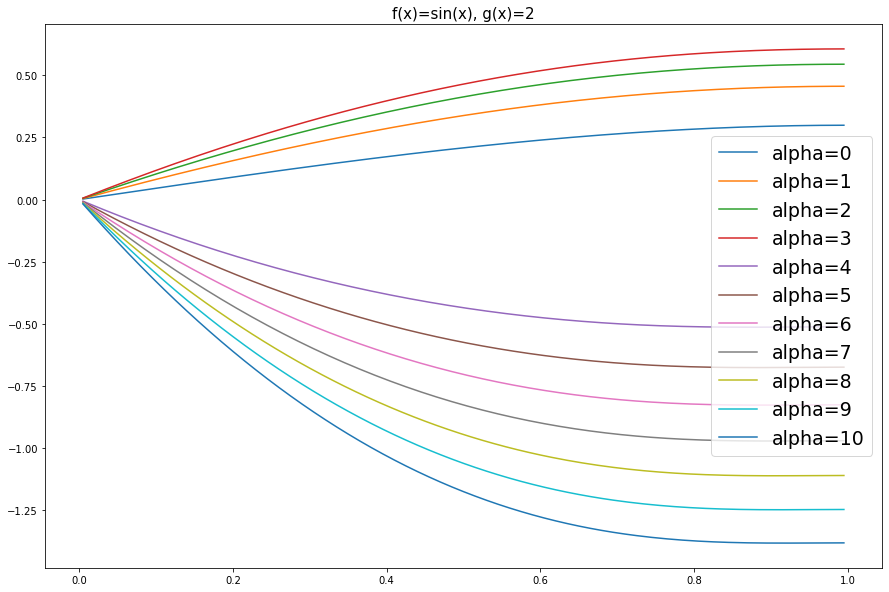

In [13]:
import matplotlib.pyplot as plt
h=0.005
n=int(1/h-1)
xk=np.linspace(h,1-h,n)
params = {'legend.fontsize': 19,
          'legend.handlelength': 2}
plt.rcParams.update(params)
fig, ax = plt.subplots(1, 1,figsize=(15,10))
for k in range(0,len(list_of_sol)):
    ax.plot(xk,np.split(list_of_sol[k],2)[0]
             ,label='alpha='+str(round(k))
           )

plt.title('f(x)=sin(x), g(x)=2',fontsize=15)


plt.legend(loc='best')

plt.show()

In [32]:
def plot(f,g,start,stop,num,r,func=0):
    list_of_sol=[]
    ll=np.linspace(start,stop,num)
    for k in ll:
        list_of_sol.append(solve(f=f,g=g,alpha=k,h=0.005))   
    h=0.005
    n=int(1/h-1)
    xk=np.linspace(h,1-h,n)
    params = {'legend.fontsize': 19,
              'legend.handlelength': 2}
    plt.rcParams.update(params)
    fig, ax = plt.subplots(1, 1,figsize=(15,10))
    for k in range(0,len(list_of_sol)):
        ax.plot(xk,np.split(list_of_sol[k],2)[func]
                 ,label='α='+str(round(ll[k],r))
               )

    #plt.title('f(x)=sin(x), g(x)=2',fontsize=15)


    plt.legend(loc='best')

    plt.show()

In [13]:
def plot(f,g,start,stop,num,r):
    list_of_sol=[]
    ll=np.linspace(start,stop,num)
    for k in ll:
        list_of_sol.append(solve(f=f,g=g,alpha=k,h=0.005))   
    h=0.005
    n=int(1/h-1)
    xk=np.linspace(h,1-h,n)
    params = {'legend.fontsize': 19,
              'legend.handlelength': 2}
    plt.rcParams.update(params)
    fig, ax = plt.subplots(1, 1,figsize=(15,10))
    for k in range(0,len(list_of_sol)):
        ax.plot(xk,np.split(list_of_sol[k],2)[0]
                 ,label='α='+str(round(ll[k],r))
               )

    #plt.title('u(x)',fontsize=15)


    plt.legend(loc='best')

    plt.show()
    
    fig, ax = plt.subplots(1, 1,figsize=(15,10))
    for k in range(0,len(list_of_sol)):
        ax.plot(xk,np.split(list_of_sol[k],2)[1]
                 ,label='α='+str(round(ll[k],r))
               )

    #plt.title('v(x)',fontsize=15)


    plt.legend(loc='best')

    plt.show()

2
746
867
518
70
152
205
237
257
272
282


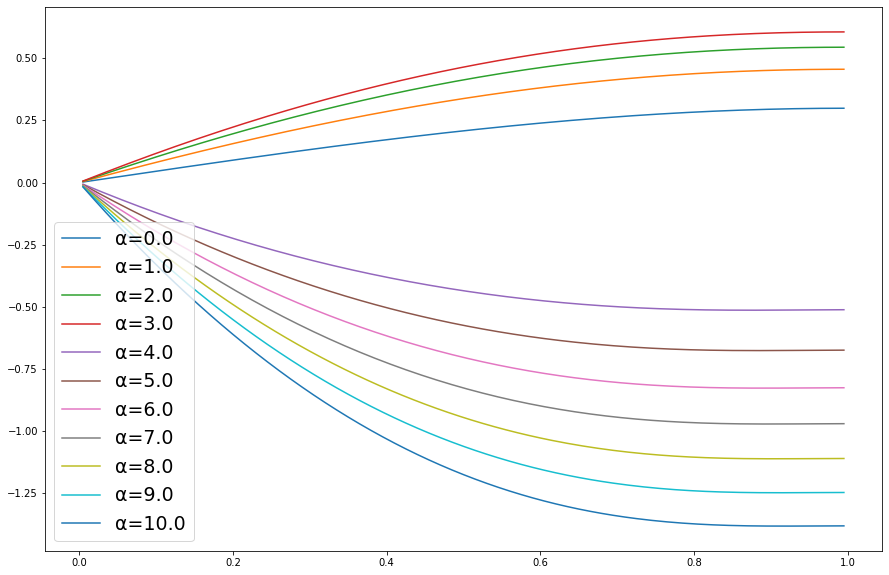

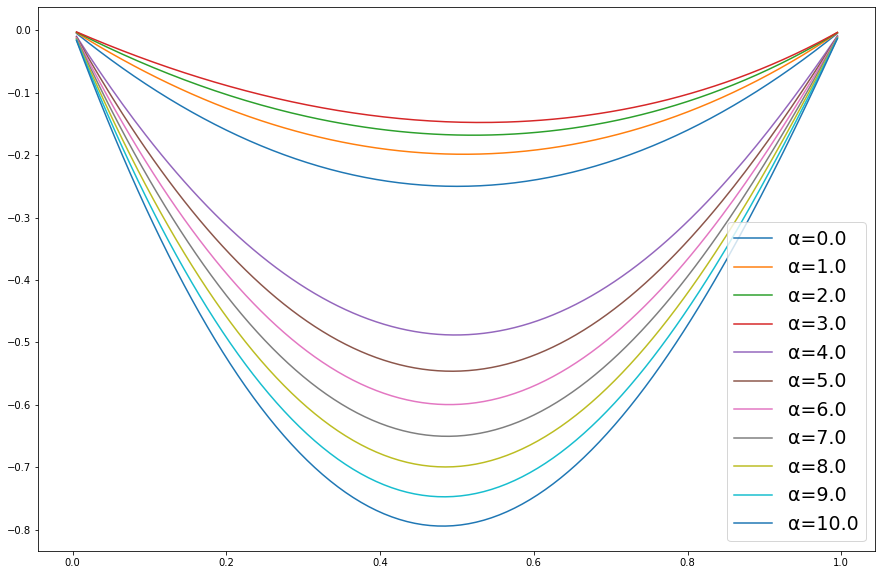

Wall time: 2min 7s


In [14]:
%%time
plot(lambda x: math.sin(x), lambda x: 2, 0,10,11,0)

518
1239
1359
641
1340
712
661
1263
1202
1182
70


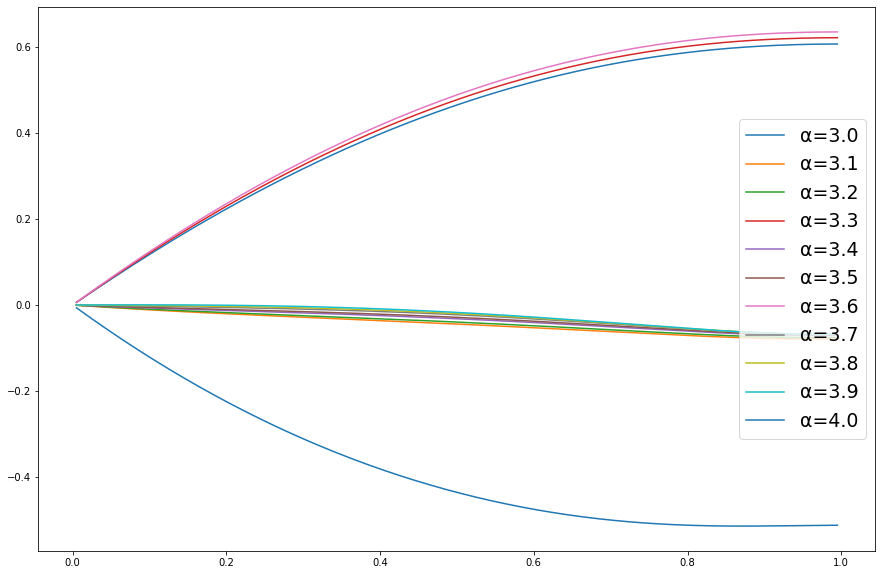

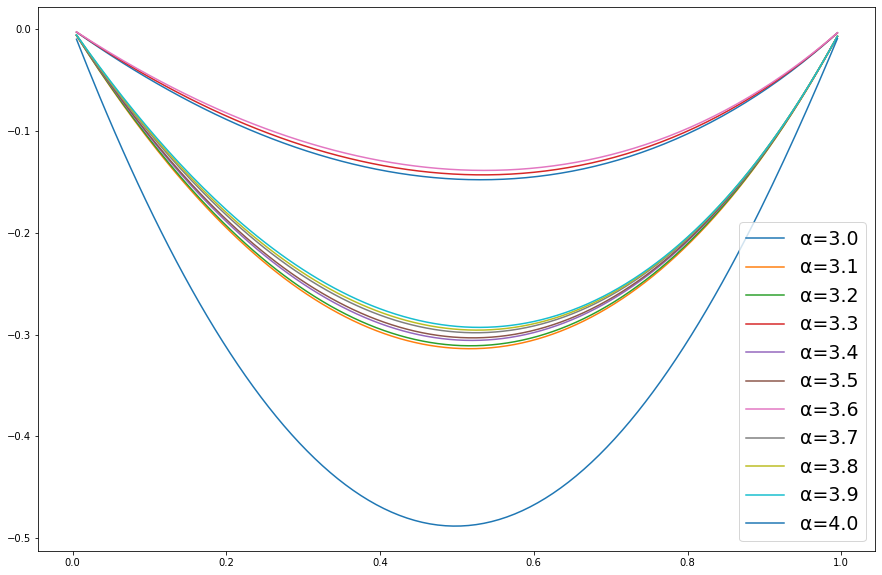

Wall time: 6min 31s


In [15]:
%%time
plot(lambda x: math.sin(x), lambda x: 2, 3,4,11,1)

2
24
44
63
81
99


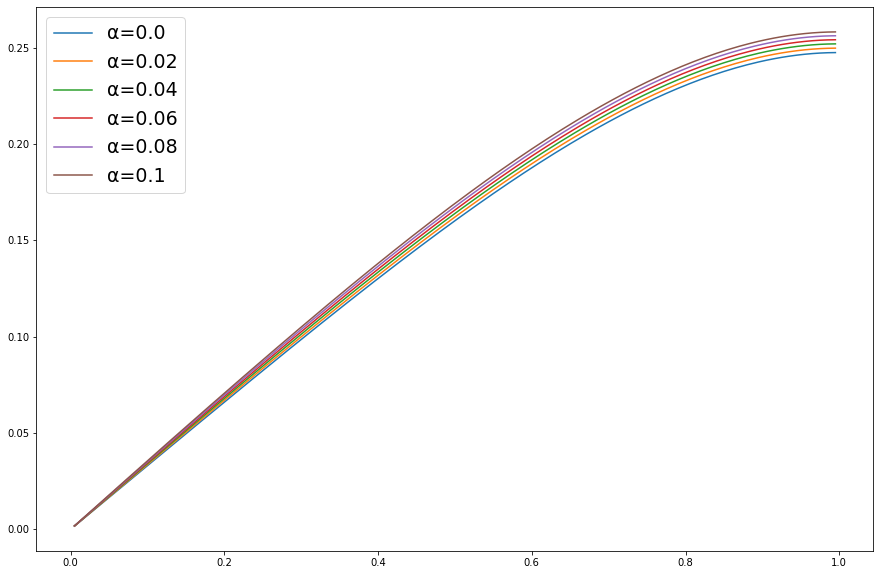

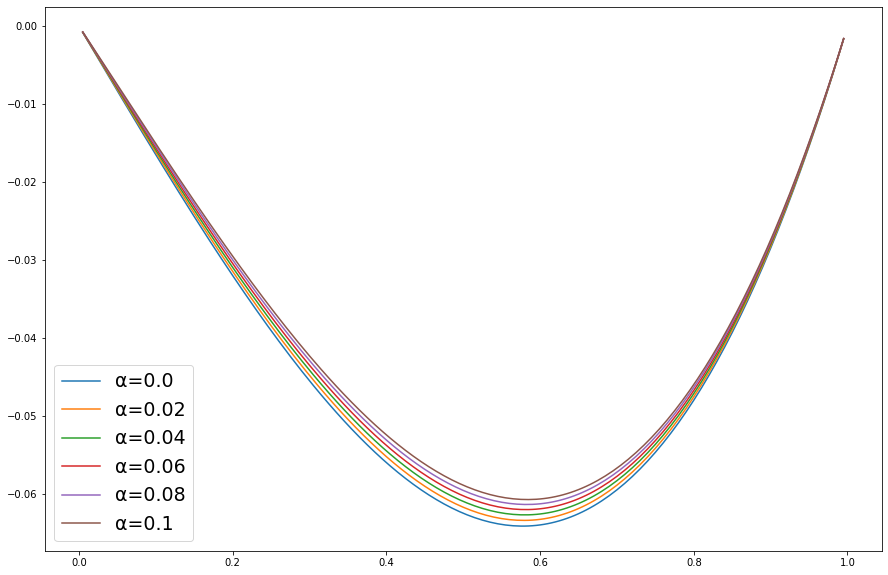

Wall time: 13.7 s


In [16]:
%%time
plot(lambda x: x**2, lambda x: x, 0,0.1,6,2)